In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import fft

In [44]:
plt.rcParams['font.size'] = 14

In [45]:
# Load the CO2 data into a DataFrame
df = pd.read_csv(
    'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mid_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])

In [46]:
# Convert 'year' and 'month' to datetime format
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')

In [47]:
df = df.set_index('date')

In [48]:
df['months'] = [x.n for x in (df.index-df.index[0])]

In [49]:
df

,site,year,month,value,months
date,,,,,
1985-05,MID,1985,5,350.28,0
1985-06,MID,1985,6,348.82,1
1985-07,MID,1985,7,347.17,2
1985-08,MID,1985,8,344.69,3
1985-09,MID,1985,9,342.39,4
...,...,...,...,...,...
2022-08,MID,2022,8,415.60,447
2022-09,MID,2022,9,414.46,448
2022-10,MID,2022,10,416.29,449


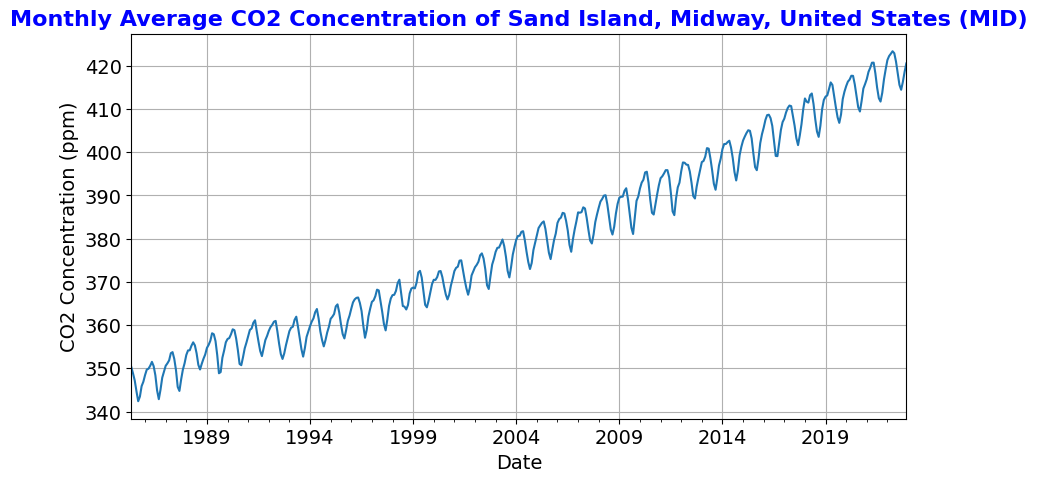

In [50]:
df['value'].plot(figsize=(10, 5), title='Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', grid=True)
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppm)')

# Increase the font size and make the title bold and blue
plt.title('Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', fontsize=16, fontweight='bold', color='blue')

plt.show()

In [51]:
num_data_points = len(df)
print(f"Number of data points: {num_data_points}")

Number of data points: 452


In [52]:
from fft import discrete_transform
import pandas as pd

# Load data from a URL into a pandas DataFrame
url = 'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mid_surface-flask_1_ccgg_month.txt'
df = pd.read_csv(url, delimiter="\s+", skiprows=54, names=['site', 'year', 'month', 'value'])

# Assuming your complex data is in the 'value' column
data_vector = df['value']

# Use the discrete_transform function
result_dft = discrete_transform(data_vector)

# Display the result or use it as needed
print("Discrete Fourier Transform Result:", result_dft)


Discrete Fourier Transform Result: [ 1.71616180e+05+0.00000000e+00j  6.40430717e+02-5.30850630e+03j
  1.54597835e+02-2.57486958e+03j -6.80253797e+01-1.75239809e+03j
 -9.74354347e+01-1.29590361e+03j -7.87828062e+01-1.11035769e+03j
 -6.48166701e+00-9.10068591e+02j -3.63449027e+01-7.95194796e+02j
 -2.06600397e+01-6.65740724e+02j -5.35937557e+01-5.99866848e+02j
 -5.03874095e+01-5.84684948e+02j -2.49903333e+01-4.75067599e+02j
 -1.20361685e+01-4.38132601e+02j -3.53509930e+01-4.14092579e+02j
 -5.16784567e+01-3.71432003e+02j -6.35870760e+01-3.21753484e+02j
 -6.10075140e+01-3.80380031e+02j -4.84131063e+01-3.03503108e+02j
 -3.94168282e+01-2.97480043e+02j -6.94362854e+01-2.93384756e+02j
 -7.48946297e+01-2.51554723e+02j -3.53179497e+01-2.68369815e+02j
 -5.34211881e+01-2.54710105e+02j -4.41317321e+01-2.33577034e+02j
 -3.76498682e+01-2.35634440e+02j -5.60572095e+01-1.92557272e+02j
 -5.79454260e+01-1.81865165e+02j -7.53282883e+01-1.76980329e+02j
 -5.85285901e+01-1.94670776e+02j -7.53415945e+01-1.7500

In [53]:
# Get the frequencies corresponding to the DFT
N = len(result_dft)
sampling_rate = 1/12  # Monthly data, so sampling rate is 1/12 samples per year
frequencies = np.fft.fftfreq(N, d=sampling_rate)


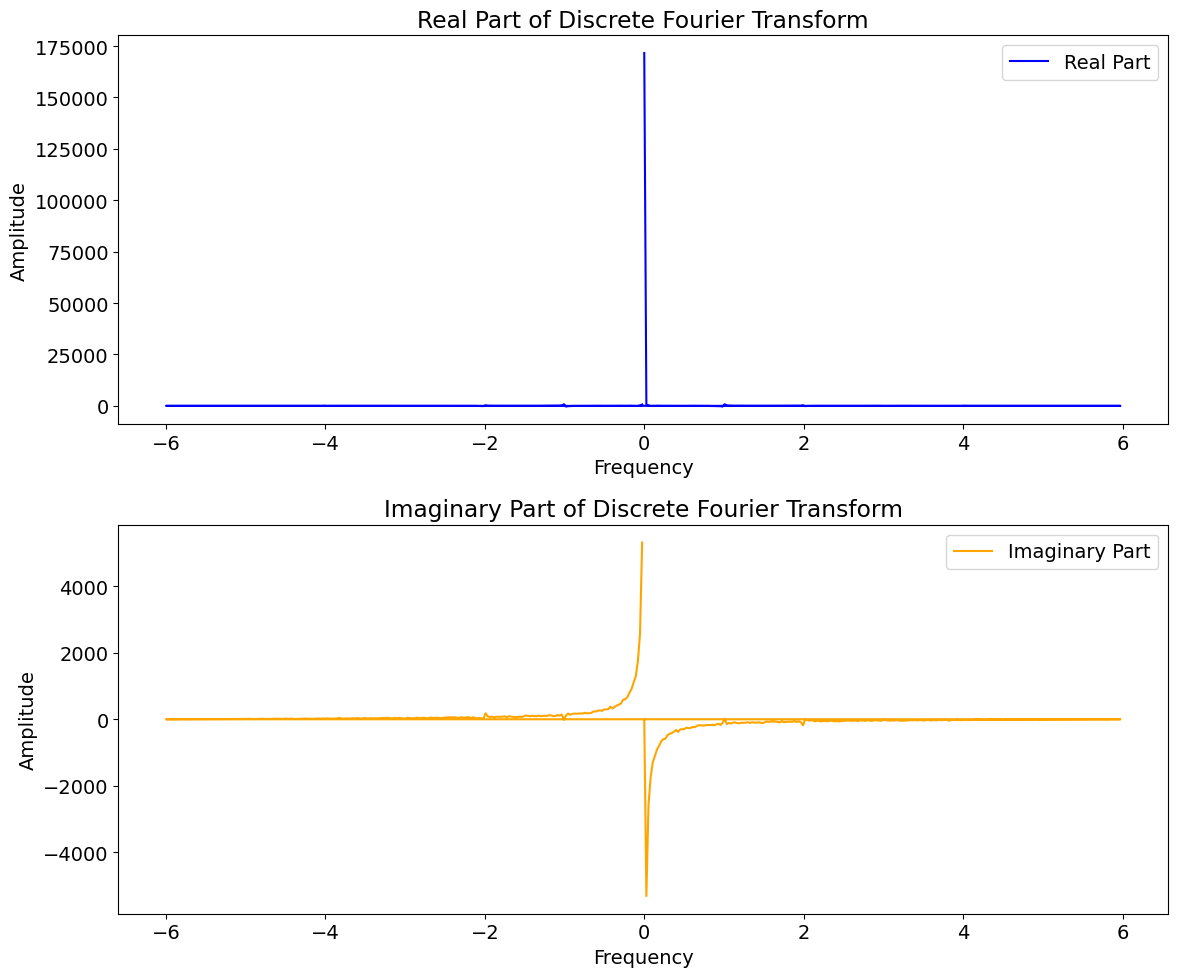

In [54]:
# Plot the real and imaginary parts of the DFT with increased spacing
plt.figure(figsize=(12, 10))

# Plot the real part
plt.subplot(2, 1, 1)
plt.plot(frequencies, result_dft.real, label='Real Part', color='blue')
plt.title('Real Part of Discrete Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

# Add some vertical spacing
plt.subplots_adjust(hspace=0.5)

# Plot the imaginary part
plt.subplot(2, 1, 2)
plt.plot(frequencies, result_dft.imag, label='Imaginary Part', color='orange')
plt.title('Imaginary Part of Discrete Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [55]:
from fft import fft

# Convert 'value' column to a NumPy array before slicing
cut_data = df['value'].to_numpy()[:256]
X = fft(cut_data)


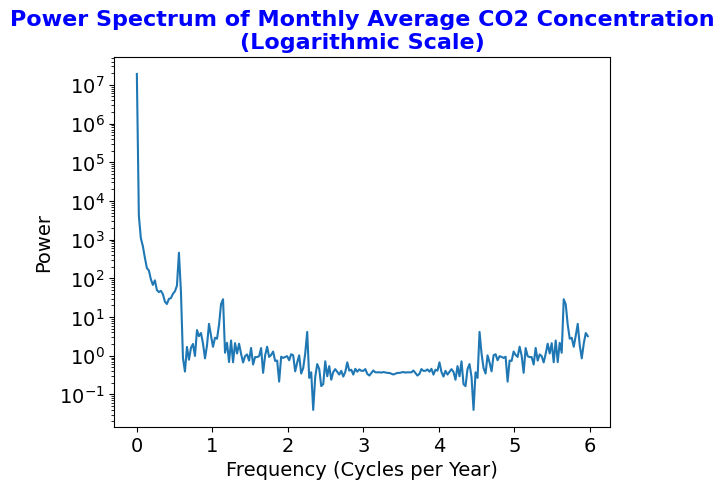

In [56]:
# Plot the power spectrum on a logarithmic scale
plt.plot(frequencies[:N//2], np.abs(X[:N//2])**2/N)
plt.yscale("log")

# Add axis labels
plt.xlabel('Frequency (Cycles per Year)')
plt.ylabel('Power')

plt.title('Power Spectrum of Monthly Average CO2 Concentration\n(Logarithmic Scale)', fontsize=16, fontweight='bold', color='blue')

plt.show()


In [68]:
def fft_power(x) :
    N = len(x)
    if N <=1 : return x
    power = np.zeros(N//2+1)
    power[0] = abs(x[0])**2
    power[1:N//2] = abs(x[1:N//2])**2 + abs(x[N-1:N//2:-1])**2
    power[N//2] = abs(x[N//2])**2
    power = power/N
    return power

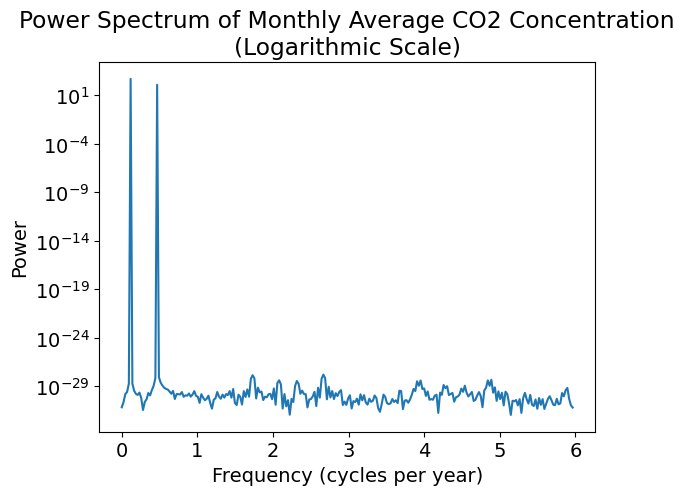

In [70]:
sampling_rate = 1  # Assuming unit sampling rate for simplicity
frequencies = np.fft.fftfreq(len(power_spectrum), d=1/sampling_rate)

# Convert bin indices to cycles per year
cycles_per_year = frequencies * 12  # Assuming monthly data, so 12 data points per year

# Plot the power spectrum
plt.plot(cycles_per_year[:len(power_spectrum)//2], power_spectrum[:len(power_spectrum)//2])
plt.yscale("log")
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Power')
plt.title('Power Spectrum of Monthly Average CO2 Concentration\n(Logarithmic Scale)')
plt.show()
